<a href="https://colab.research.google.com/github/ibixina/ML/blob/main/training_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("./training_data.csv")
print(data.shape)
data.head(20)

(252, 7)


,morale,gain,statType,initial_morale,initial_stat,experience,energy
0,5,4.71,NaN,334,13669.57,3,5
1,132,146.05,NaN,399,13674.33,80,150
2,21,23.11,NaN,163,13821.84,14,25
3,138,143.98,NaN,323,13845.18,82,150
4,134,169.97,NaN,2457,4444.44,67,150
5,132,143.38,agility,299,13990.60,63,150
6,10,9.24,agility,187,14135.41,5,10
7,134,134.53,strength,1687,4616.11,64,150
8,333,31.47,agility,400,14144.75,16,35
9,135,150.36,agility,400,14176.53,63,150


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/12U5U0k2PXSE37LDnyW2iYGfD0B5Ba2FZtRPfWpTpRbA/edit#gid=0


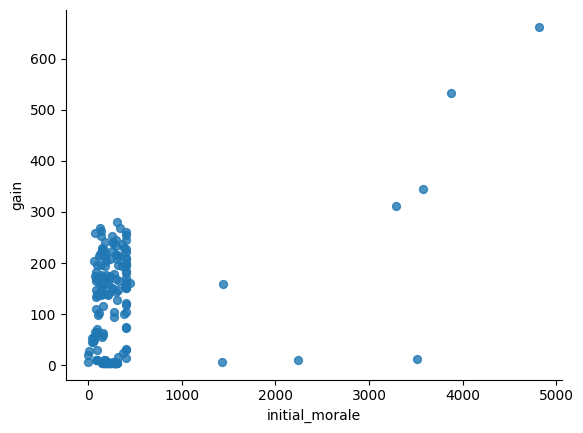

In [8]:
# @title morale vs energy

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='initial_morale', y='gain', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:

y = data["gain"]




predictors = ["energy", "initial_morale", "initial_stat", "statTypeNum"]

# convert statType to numbers and make a new column
data["statTypeNum"] = data["statType"].map({"strength": 0, "agility": 1, "speed": 2})

# Nan becomes agility
data["statTypeNum"] = data["statTypeNum"].fillna(1)

data.head()

# X = data[predictors]
# X.head()

,morale,gain,statType,initial_morale,initial_stat,experience,energy,statTypeNum
0,5,4.71,NaN,334,13669.57,3,5,1.0
1,132,146.05,NaN,399,13674.33,80,150,1.0
2,21,23.11,NaN,163,13821.84,14,25,1.0
3,138,143.98,NaN,323,13845.18,82,150,1.0
4,134,169.97,NaN,2457,4444.44,67,150,1.0


In [6]:
# filter out and keep only one statType
data = data[data["statType"] == "agility"]
y = data["gain"]
X = data[predictors]
print(X.shape, y.shape)
X.head()

(176, 4) (176,)


,energy,initial_morale,initial_stat,statTypeNum
5,150,299,13990.60,1.0
6,10,187,14135.41,1.0
8,35,400,14144.75,1.0
9,150,400,14176.53,1.0
10,130,306,14328.40,1.0


In [7]:
X = data[predictors]
print(X.shape, y.shape)
X.head()

(176, 4) (176,)


,energy,initial_morale,initial_stat,statTypeNum
5,150,299,13990.60,1.0
6,10,187,14135.41,1.0
8,35,400,14144.75,1.0
9,150,400,14176.53,1.0
10,130,306,14328.40,1.0


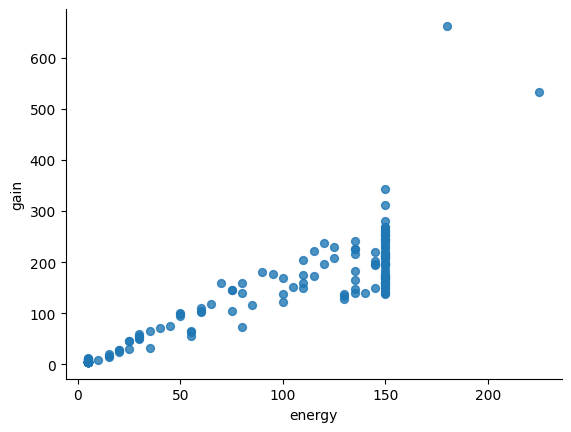

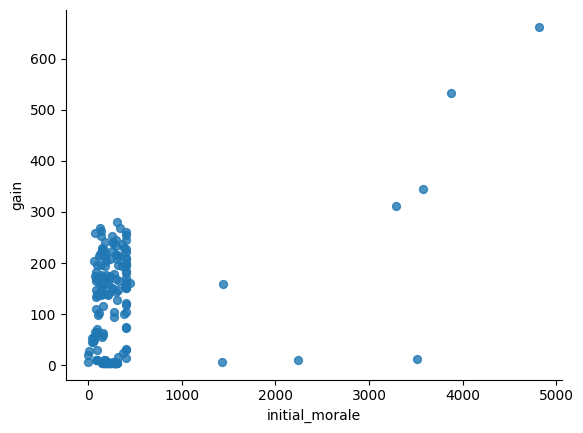

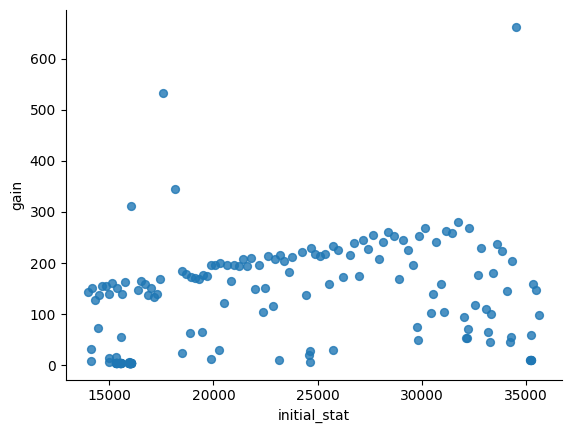

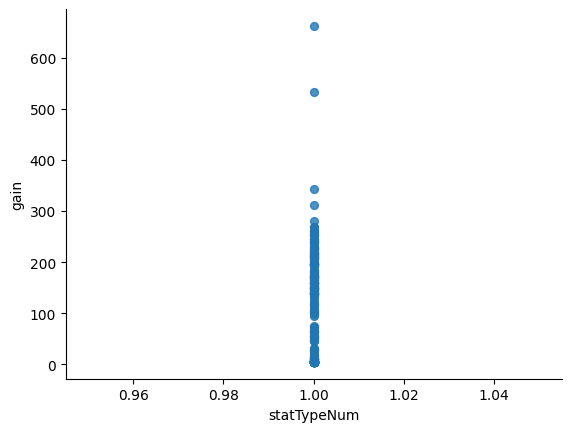

In [9]:
#generate plots for each predictoes
for predictor in predictors:
    data.plot(kind='scatter', x=predictor, y='gain', s=32, alpha=.8)
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.show()

In [ ]:
intermediateY = data["morale"]
print(intermediateY.shape)
intermediatePredictors = ["energy", "initial_morale", "initial_stat", "statTypeNum"]
intermediateX = data[intermediatePredictors]

(184,)


In [ ]:
itrain_x, itest_x, itrain_y, itest_y = train_test_split(intermediateX, intermediateY, test_size=0.1, random_state=42)
print(itrain_x.shape, itrain_y.shape, itest_x.shape, itest_y.shape)

itrain_y.head()

(165, 4) (165,) (19, 4) (19,)


,morale
56,5
164,124
124,85
146,131
30,4


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = [
    LinearRegression,
    DecisionTreeRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    SVR,
]  # Replace with regression models

for model in models:
    print(model.__name__)  # Get the model name
    clf = model()
    clf.fit(itrain_x, itrain_y)
    print(clf.score(itest_x, itest_y))
    print(f"itest_x: {itest_x.iloc[0]}")
    print(f"itest_y: {itest_y.iloc[0]}")
    print(f"predicted: {clf.predict([itest_x.iloc[0]])}")
    print("\n")

LinearRegression


NameError: name 'itrain_x' is not defined

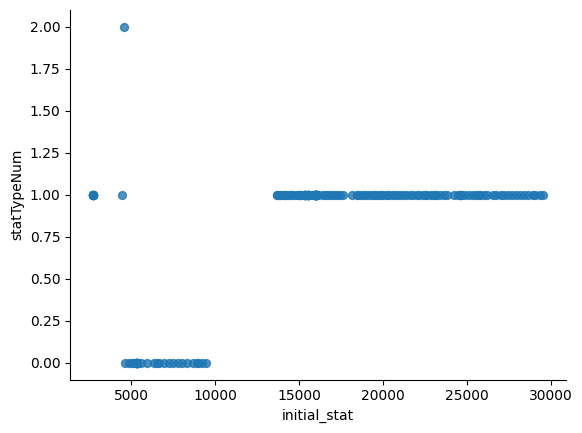

In [ ]:
# @title initial_stat vs statTypeNum

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='initial_stat', y='statTypeNum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(88, 4) (88, 4) (88,) (88,)


In [ ]:
# lets try linar regression
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS

import numpy as np

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

print(model.coef_)
print(model.intercept_)

[1.22759034 0.03764554 0.00460462 0.        ]
-92.6757318259519


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge

models = [
    LinearRegression,
    DecisionTreeRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    SVR,
    XGBRegressor,
    Lasso,
    BayesianRidge

]  # Replace with regression models

models_trained = {}

best_score = -1
best_model = None

for model in models:
    print(model.__name__)  # Get the model name
    clf = model()
    clf.fit(x_train, y_train)

    models_trained[model.__name__] = clf
    score = clf.score(x_test, y_test)
    if score > best_score:
        best_score = score
        best_model = clf
    print(clf.score(x_test, y_test))
    print(f"x_test: {x_test.iloc[0]}")
    print(f"y_test: {y_test.iloc[0]}")
    print(f"predicted: {clf.predict([x_test.iloc[0]])}")
    print("\n")

# save the best model
import pickle
pickle.dump(best_model, open(best_model.__class__.__name__+".pkl", "wb"))

def check_model(m):
  # print name
  print(m.__class__.__name__)
  predictions = m.predict(x_test)

  for ny, ny_pred in zip(y_test, predictions):
      print(f"y: {ny}, y_pred: {ny_pred} diff: {ny - ny_pred}")

to_check = best_model
check_model(to_check)

LinearRegression
0.9007024836557813
x_test: energy                5.0
initial_morale      279.0
initial_stat      15348.7
statTypeNum           1.0
Name: 29, dtype: float64
y_test: 5.4
predicted: [-11.0291]


DecisionTreeRegressor
0.9722414584114205
x_test: energy                5.0
initial_morale      279.0
initial_stat      15348.7
statTypeNum           1.0
Name: 29, dtype: float64
y_test: 5.4
predicted: [5.41]


RandomForestRegressor
0.9842450153728912
x_test: energy                5.0
initial_morale      279.0
initial_stat      15348.7
statTypeNum           1.0
Name: 29, dtype: float64
y_test: 5.4
predicted: [5.3539]


GradientBoostingRegressor


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.9903482493865851
x_test: energy                5.0
initial_morale      279.0
initial_stat      15348.7
statTypeNum           1.0
Name: 29, dtype: float64
y_test: 5.4
predicted: [5.59518142]


SVR
-0.3387511620699495
x_test: energy                5.0
initial_morale      279.0
initial_stat      15348.7
statTypeNum           1.0
Name: 29, dtype: float64
y_test: 5.4
predicted: [154.42311478]


XGBRegressor
0.9852075949575811
x_test: energy                5.0
initial_morale      279.0
initial_stat      15348.7
statTypeNum           1.0
Name: 29, dtype: float64
y_test: 5.4
predicted: [5.0170007]


Lasso
0.9006891528121875
x_test: energy                5.0
initial_morale      279.0
initial_stat      15348.7
statTypeNum           1.0
Name: 29, dtype: float64
y_test: 5.4
predicted: [-11.01058972]


BayesianRidge
0.9003786512431455
x_test: energy                5.0
initial_morale      279.0
initial_stat      15348.7
statTypeNum           1.0
Name: 29, dtype: float64
y_test: 5.4
predicted: [-10

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


In [22]:
# decision tree model

decision_tree_model = models_trained["DecisionTreeRegressor"]
decision_tree_model.fit(x_train, y_train)
decision_tree_model.score(x_test, y_test)

0.9629792117696171

In [23]:
test_data1 = {
    "energy": 5,
    "initial_morale": 15,
    "initial_stat": 35016.13,
    "statTypeNum": 1
}
predicted_value1 = decision_tree_model.predict([list(test_data1.values())])
print(f"Predicted value for test_data1: {predicted_value1}")

Predicted value for test_data1: [7.07]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [24]:
test_data2 = {
    "energy": 5,
    "initial_morale": 11,
    "initial_stat": 35716.45,
    "statTypeNum": 1
}
predicted_value2 = decision_tree_model.predict([list(test_data2.values())])
print(f"Predicted value for test_data2: {predicted_value2}")

Predicted value for test_data2: [7.07]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [25]:
from sklearn.tree import export_text

tree_rules = export_text(decision_tree_model, feature_names=predictors)
print(tree_rules)

|--- energy <= 67.50
|   |--- energy <= 22.50
|   |   |--- energy <= 12.50
|   |   |   |--- initial_stat <= 19608.84
|   |   |   |   |--- initial_stat <= 14728.91
|   |   |   |   |   |--- value: [9.24]
|   |   |   |   |--- initial_stat >  14728.91
|   |   |   |   |   |--- initial_morale <= 197.50
|   |   |   |   |   |   |--- initial_morale <= 180.00
|   |   |   |   |   |   |   |--- initial_stat <= 16044.72
|   |   |   |   |   |   |   |   |--- initial_stat <= 16034.20
|   |   |   |   |   |   |   |   |   |--- initial_morale <= 176.00
|   |   |   |   |   |   |   |   |   |   |--- value: [5.15]
|   |   |   |   |   |   |   |   |   |--- initial_morale >  176.00
|   |   |   |   |   |   |   |   |   |   |--- value: [5.21]
|   |   |   |   |   |   |   |   |--- initial_stat >  16034.20
|   |   |   |   |   |   |   |   |   |--- value: [5.35]
|   |   |   |   |   |   |   |--- initial_stat >  16044.72
|   |   |   |   |   |   |   |   |--- initial_stat <= 16050.01
|   |   |   |   |   |   |   |   |   |--- 

In [29]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.6 MB/s eta 0:00:00
  Using cached pyod-2.0.5-py3-none-any.whl.metadata (46 kB)
  Using cached category_encoders-2.8.1-py3-none-any.whl.metadata (7.9 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached xxhash-3.5.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl.metadata (15 kB)
  Using cached schemdraw-0.15-py3-none-any.whl.metadata (2.2 kB)
  Using cached plotly_resampler-0.10.0-py3-none-any.whl.metadata (13 kB)
  Using cached tbats-1.1.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
INFO: pip is looking at multiple versions of categor

In [12]:
# use pycaret to run all models

from pycaret.regression import setup, compare_models, pull, save_model, tune_model, create_model
import pandas as pd


s = setup(data, target = 'gain',
          ignore_features=['statType'],
          numeric_features = predictors,
          session_id=123)

best = compare_models()
tuned_best = tune_model(best)

# After running compare_models()
best_model_results = pull()
print(best_model_results)

save_model(tuned_best, 'pycaret_best_model')


,Description,Value
0,Session id,123
1,Target,gain
2,Target type,Regression
3,Original data shape,"(176, 8)"
4,Transformed data shape,"(176, 7)"
5,Transformed train set shape,"(123, 7)"
6,Transformed test set shape,"(53, 7)"
7,Ignore features,1
8,Numeric features,4
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,7.6051,590.5503,14.9434,0.9740,0.1077,0.0749,0.1190
gbr,Gradient Boosting Regressor,9.3199,768.1842,18.3925,0.9658,0.1532,0.0981,0.0880
rf,Random Forest Regressor,11.7943,1169.7675,24.3059,0.9370,0.1522,0.0983,0.1600
xgboost,Extreme Gradient Boosting,11.4392,798.4219,22.9824,0.9320,0.2080,0.1178,0.1170
dt,Decision Tree Regressor,13.7745,813.6198,24.9376,0.9275,0.1931,0.1198,0.0230
br,Bayesian Ridge,18.9856,836.0226,26.3529,0.9218,0.5043,1.1543,0.0230
en,Elastic Net,19.0901,840.0626,26.4904,0.9217,0.5125,1.1664,0.0400
lr,Linear Regression,19.0933,840.3737,26.4967,0.9216,0.5130,1.1669,0.6930
lasso,Lasso Regression,19.1029,840.2538,26.4995,0.9216,0.5127,1.1667,0.0230
lar,Least Angle Regression,19.0933,840.3737,26.4967,0.9216,0.5130,1.1669,0.0420


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19.9792,599.1047,24.4766,0.9110,0.7430,1.1443
1,18.8887,455.8550,21.3508,0.9545,0.6892,0.9961
2,17.1470,356.9200,18.8923,0.9341,0.5557,0.6425
3,16.5800,371.7208,19.2801,0.9592,0.8165,1.3310
4,21.9313,690.9230,26.2854,0.9568,0.7750,1.2148
5,32.2414,4914.3435,70.1024,0.7630,0.4695,0.5371
6,18.9611,395.5796,19.8892,0.9359,0.5390,0.6478
7,21.0657,691.5715,26.2977,0.9092,0.6058,0.7318
8,48.6343,12730.0370,112.8275,0.5941,0.7200,0.9983


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
          MAE         MSE      RMSE      R2   RMSLE    MAPE
Fold                                                       
0     19.9792    599.1047   24.4766  0.9110  0.7430  1.1443
1     18.8887    455.8550   21.3508  0.9545  0.6892  0.9961
2     17.1470    356.9200   18.8923  0.9341  0.5557  0.6425
3     16.5800    371.7208   19.2801  0.9592  0.8165  1.3310
4     21.9313    690.9230   26.2854  0.9568  0.7750  1.2148
5     32.2414   4914.3435   70.1024  0.7630  0.4695  0.5371
6     18.9611    395.5796   19.8892  0.9359  0.5390  0.6478
7     21.0657    691.5715   26.2977  0.9092  0.6058  0.7318
8     48.6343  12730.0370  112.8275  0.5941  0.7200  0.9983
9     11.2650    224.5217   14.9840  0.9674  0.4666  0.4813
Mean  22.6694   2143.0577   35.4386  0.8885  0.6380  0.8725
Std   10.0092   3771.9026   29.7853  0.1131  0.1210  0.2865
Transformat

(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['energy', 'initial_morale',
                                              'initial_stat', 'statTypeNum'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123))]),
 'pycaret_best_model.pkl')

In [13]:
best_model_results = pull()
print(best_model_results)

          MAE         MSE      RMSE      R2   RMSLE    MAPE
Fold                                                       
0     19.9792    599.1047   24.4766  0.9110  0.7430  1.1443
1     18.8887    455.8550   21.3508  0.9545  0.6892  0.9961
2     17.1470    356.9200   18.8923  0.9341  0.5557  0.6425
3     16.5800    371.7208   19.2801  0.9592  0.8165  1.3310
4     21.9313    690.9230   26.2854  0.9568  0.7750  1.2148
5     32.2414   4914.3435   70.1024  0.7630  0.4695  0.5371
6     18.9611    395.5796   19.8892  0.9359  0.5390  0.6478
7     21.0657    691.5715   26.2977  0.9092  0.6058  0.7318
8     48.6343  12730.0370  112.8275  0.5941  0.7200  0.9983
9     11.2650    224.5217   14.9840  0.9674  0.4666  0.4813
Mean  22.6694   2143.0577   35.4386  0.8885  0.6380  0.8725
Std   10.0092   3771.9026   29.7853  0.1131  0.1210  0.2865
